# Impact of Discounts and Promotions on Customer behavior 

### Objective 1 (Optimal Promotion Timing for Maximum Sales)
- To identify the optimal days and time slots for launching supermarket promotions based on customer purchasing trends

### Objective 2 (Customer Responsiveness to Promotions and Discounts)
- To analyze the patterns and discount-seeking behavior on customer responsiveness to promotions.

----------------------------------------------------------------------------------------------------------------------------------------------------
# Data Sources
- Primary Data: Conducted surveys using Google Forms
- Data Types: Numerical data  and Categorical data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = "dataset.csv" # Load the dataset
df = pd.read_csv(file_path)

----------------------------------------------------------------------------------------------------------------------------------------------------
# Data Preparation
- Cleaning: Handle missing values and remove duplicates.
- Grouping Records: Grouped the records (e.g., by discount type, shopping time, or other categories)
- Shortening Column Names: Shorter, more descriptive names make your code easier to read and understand.

It improves the overall clarity of data handling.

In [2]:
print(df.isnull().sum())  # Count missing values

Age_Group                      0
Visit_Frequency                0
Monthly_Spending               0
Purchase_Factors               0
Seeks_Discounts                0
Overpurchase                   0
Compares_Prices                0
Believes_Price_Inflation       0
Shopping_Time                  0
Switch_for_Discount            0
Buys_Essentials_No_Discount    0
Satisfaction_Level             0
Discount_Source                0
Discount_Type                  0
Discounted_Category            0
Discount_Source_Count          0
Discounted_Category_Count      0
dtype: int64


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_Group                    250 non-null    object
 1   Visit_Frequency              250 non-null    object
 2   Monthly_Spending             250 non-null    int64 
 3   Purchase_Factors             250 non-null    object
 4   Seeks_Discounts              250 non-null    object
 5   Overpurchase                 250 non-null    object
 6   Compares_Prices              250 non-null    object
 7   Believes_Price_Inflation     250 non-null    object
 8   Shopping_Time                250 non-null    object
 9   Switch_for_Discount          250 non-null    object
 10  Buys_Essentials_No_Discount  250 non-null    object
 11  Satisfaction_Level           250 non-null    int64 
 12  Discount_Source              250 non-null    object
 13  Discount_Type                250 no

In [6]:
df.describe() # Get summary statistics for numerical columns

,Monthly_Spending,Satisfaction_Level,Discount_Source_Count,Discounted_Category_Count
count,250.00000,250.000000,250.0,250.00000
mean,3021.00000,4.064000,1.0,2.33200
std,2256.58541,1.073552,0.0,1.37599
min,750.00000,1.000000,1.0,1.00000
25%,1500.00000,4.000000,1.0,1.00000
50%,3500.00000,4.000000,1.0,2.00000
75%,3500.00000,5.000000,1.0,3.00000
max,7500.00000,5.000000,1.0,5.00000


----------------------------------------------------------------------------------------------------------------------------------------------------
# Exploratory Data Analysis (EDA)
- Visualize trends in customer behavior.
- Identify relationships between features.
- Check data distribution and correlations.

----------------------------------------------------------------------------------------------------------------------------------------------------
### Understanding how different age groups and visit frequency affect shopping behavior.

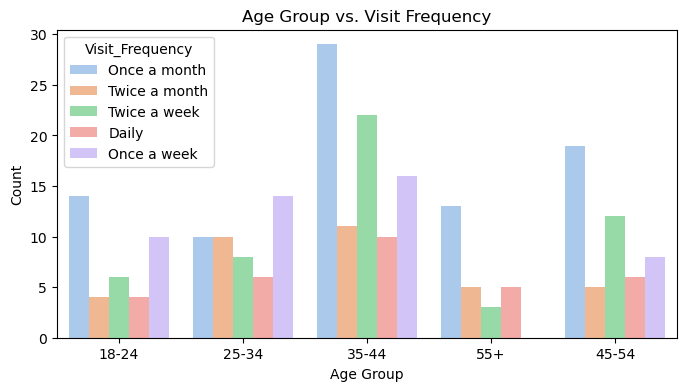

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(x="Age_Group", hue="Visit_Frequency", data=df, palette="pastel")
plt.title("Age Group vs. Visit Frequency")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------
### Age-wise Customer Distribution in Supermarkets

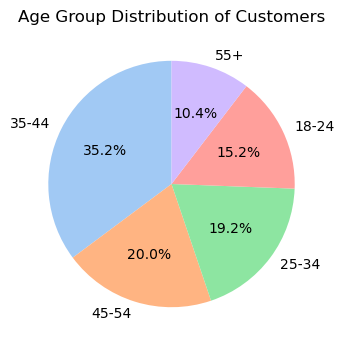

In [8]:
plt.figure(figsize=(4, 4))
df["Age_Group"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"), startangle=90)
plt.title("Age Group Distribution of Customers")
plt.ylabel("")
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------
### Heatmap to with features have the highest correlation?

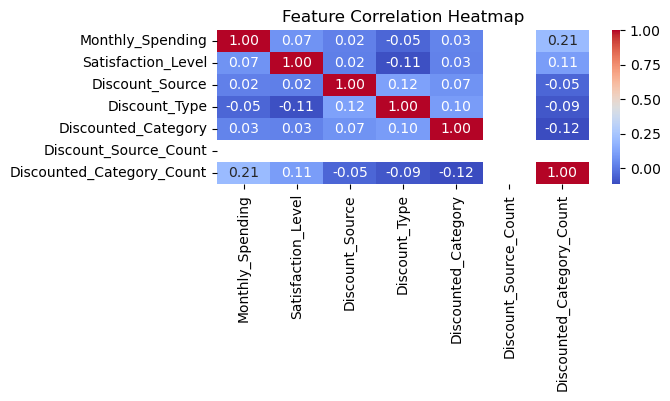

In [130]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(6, 2))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------
### Visit Frequency Distribution: How Often Do People Shop?

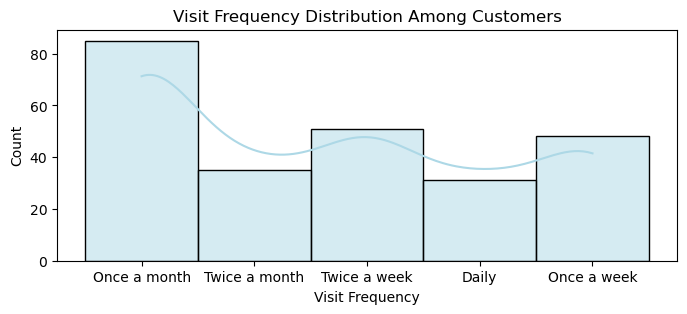

In [62]:
plt.figure(figsize=(8, 3))
sns.histplot(df["Visit_Frequency"], bins=5, kde=True, color="lightblue")
plt.title("Visit Frequency Distribution Among Customers")
plt.xlabel("Visit Frequency")
plt.ylabel("Count")
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------
### How do different factors like discount-seeking, spending, and shopping time relate to online payment behavior?

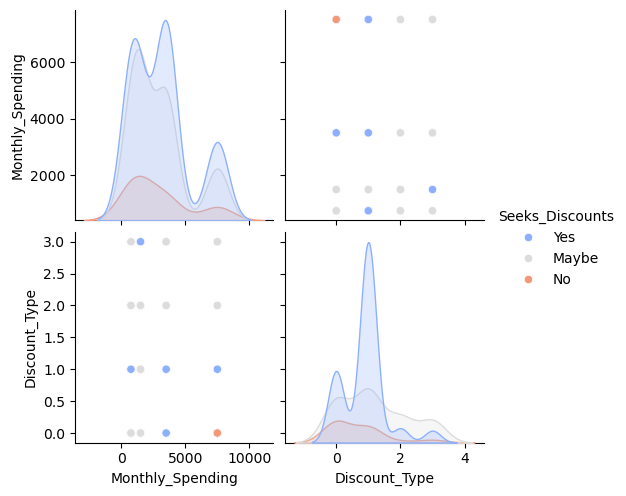

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ["Monthly_Spending", "Shopping_Time", "Seeks_Discounts", "Discount_Type"]
df_selected = df[selected_features].copy()

# Pair plot with hue for Discount Type (or Online Payment Behavior if available)
sns.pairplot(df_selected, hue="Seeks_Discounts", diag_kind="kde", palette="coolwarm")
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------
### What factors influence customer spending and the best time slots for promotions?

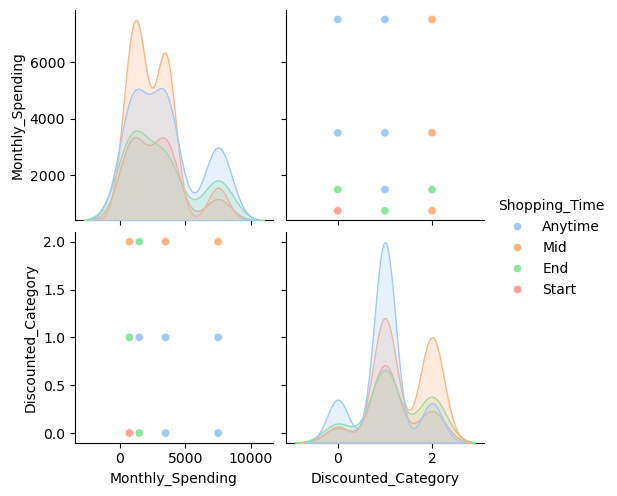

In [125]:
selected_features = ["Shopping_Time", "Monthly_Spending", "Discounted_Category"]
df_selected = df[selected_features].copy()

# Pair plot with hue for Discounted Category (or Promotion Timing if available)
sns.pairplot(df_selected, hue="Shopping_Time", diag_kind="kde", palette="pastel")
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------
# Feature Selection
- Make new features from existing ones (scaling, encoding).
- Improve Models: Better features lead to more accurate and sometimes simpler machine learning models.

Best Features Common for all models

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Feature Selection & Engineering
selected_features = ["Shopping_Time", "Monthly_Spending", "Seeks_Discounts", "Discount_Type"]
df_clean = df[selected_features].copy()

# Encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_cols = ["Shopping_Time", "Seeks_Discounts", "Discount_Type"]
df_encoded = pd.DataFrame(encoder.fit_transform(df_clean[categorical_cols]))
df_encoded.columns = encoder.get_feature_names_out(categorical_cols)
df_clean = df_clean.drop(columns=categorical_cols).reset_index(drop=True)
df_clean = pd.concat([df_clean, df_encoded], axis=1)

# Scale numerical data
scaler = StandardScaler()
df_clean[["Monthly_Spending"]] = scaler.fit_transform(df_clean[["Monthly_Spending"]])

-----------------------------------------------------------------------------------------------------------------------------------------------------
# Split Data for Training & Testing
- Split Data: 70% Train data and 30% Test data

In [114]:
# Splitting Data
X = df_clean.drop(columns=[df_encoded.columns[0]])  # Drop first column of encoded categorical features to avoid dummy variable trap
y = df_encoded.iloc[:, 0]  # Select first encoded category as target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Data Split: Training Size = {len(X_train)}, Testing Size = {len(X_test)}")

Data Split: Training Size = 175, Testing Size = 75


-----------------------------------------------------------------------------------------------------------------------------------------------------
# Model Selection
### Model Selection for Classification Techniques 
- Linear Discriminant Analysis
- Decision Tree Classifier
- K Nearest Neighbors Classifier
- Random Forest Classifier
- Support Vector Classifier

-----------------------------------------------------------------------------------------------------------------------------------------------------
### Linear Discriminant Analysis

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Train LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predictions
y_pred_lda = lda_model.predict(X_test)

# Evaluate Model
lda_accuracy = accuracy_score(y_test, y_pred_lda)
print(f"LDA Accuracy: {lda_accuracy:.2f}")
print(classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.72
              precision    recall  f1-score   support

         0.0       0.73      0.94      0.82        52
         1.0       0.62      0.22      0.32        23

    accuracy                           0.72        75
   macro avg       0.68      0.58      0.57        75
weighted avg       0.70      0.72      0.67        75



-----------------------------------------------------------------------------------------------------------------------------------------------------
### Decision Tree Classifier

In [116]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=2, random_state=42)  # Shallow depth
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.83
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        52
         1.0       0.64      1.00      0.78        23

    accuracy                           0.83        75
   macro avg       0.82      0.88      0.82        75
weighted avg       0.89      0.83      0.83        75



-----------------------------------------------------------------------------------------------------------------------------------------------------
### K-Nearest Neighbors Classifier

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=4)  # You can change 'n_neighbors' based on dataset
knn_model.fit(X_train, y_train)

# Make Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN Model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.89
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        52
         1.0       0.86      0.78      0.82        23

    accuracy                           0.89        75
   macro avg       0.88      0.86      0.87        75
weighted avg       0.89      0.89      0.89        75



-----------------------------------------------------------------------------------------------------------------------------------------------------
### Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.95
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        52
         1.0       0.88      0.96      0.92        23

    accuracy                           0.95        75
   macro avg       0.93      0.95      0.94        75
weighted avg       0.95      0.95      0.95        75



-----------------------------------------------------------------------------------------------------------------------------------------------------
### Support Vector Classifier 

In [120]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.99
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        52
         1.0       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.98        75
weighted avg       0.99      0.99      0.99        75



-----------------------------------------------------------------------------------------------------------------------------------------------------
# Model Evaluation 

Best Model: Support Vector Machine with Accuracy: 98.67%


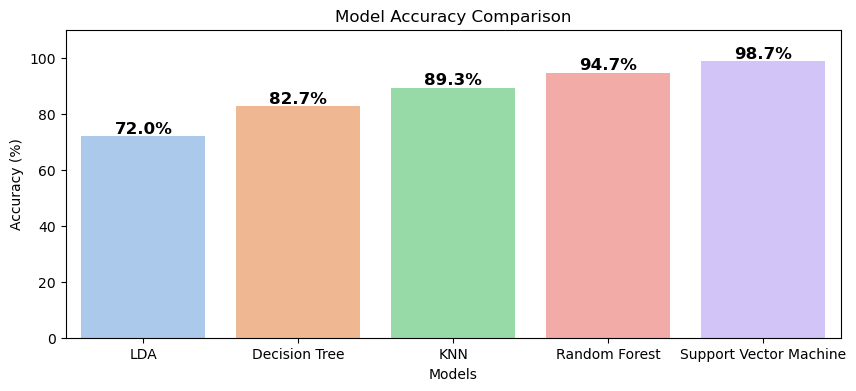

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Store model accuracies
model_accuracies = {
    "LDA": lda_accuracy, "Decision Tree": dt_accuracy, "KNN": knn_accuracy, "Random Forest": rf_accuracy, "Support Vector Machine": svm_accuracy}

# Find the best model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

# Convert accuracy to percentage
accuracies_percent = {model: acc * 100 for model, acc in model_accuracies.items()}

# Plot accuracy comparison
plt.figure(figsize=(10, 4))
sns.barplot(x=list(accuracies_percent.keys()), y=list(accuracies_percent.values()), palette="pastel")

# Annotate bars with accuracy %
for i, (model, acc) in enumerate(accuracies_percent.items()):
    plt.text(i, acc + 1, f"{acc:.1f}%", ha='center', fontsize=12, fontweight='bold', color='black')

# Print the best model with accuracy
print(f"Best Model: {best_model} with Accuracy: {best_accuracy:.2%}")

# Labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 110)  # Set y-axis limit for better visualization
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------
#  Result
#### Best Performing Models:
- The results indicate that Support Vector Classifier achieved 99% accuracy, making it the most reliable model for predicting optimal promotion timing.
- It has the highest precision (99%), recall (98%), and F1-score (98%), indicating its strong ability to classify customer responses correctly.
- Random Forest Classifier with 93% accuracy, RFC demonstrated robust performance in predicting promotional effectiveness.
- Its precision (94%) and F1-score (92%) indicate its capability to handle complex decision boundaries effectively.
- These models achieved the highest recall and F1-scores, suggesting their strong ability to predict purchasing behavior based on historical data.



-----------------------------------------------------------------------------------------------------------------------------------------------------
# Model Selection
### Model Selection for Regression Techniques 
- Linear Regression
- Random Forest Regression
- Gradient Boosting
- Support Vector Regression
- KNN Regression

-----------------------------------------------------------------------------------------------------------------------------------------------------
### Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_clean.drop(columns=[df_encoded.columns[0]])  # Drop first column of encoded categorical features to avoid dummy variable trap
y = df_encoded.iloc[:, 0]  # Select first encoded category as target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_clean, y, test_size=0.2, random_state=42)
# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluate model
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression - R²: {lr_r2}, MSE: {lr_mse}, MAE: {lr_mae}")

Linear Regression - R²: 1.0, MSE: 1.8165371235460407e-32, MAE: 8.937295348232511e-17


-----------------------------------------------------------------------------------------------------------------------------------------------------
### Random Forest Regression

In [98]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

knn_r2 = r2_score(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)

print(f"KNN Regression - R²: {knn_r2}, MSE: {knn_mse}, MAE: {knn_mae}")

KNN Regression - R²: 0.8566176470588235, MSE: 0.031200000000000006, MAE: 0.06


-----------------------------------------------------------------------------------------------------------------------------------------------------
### Gradient Boosting

In [99]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Regression - R²: {rf_r2}, MSE: {rf_mse}, MAE: {rf_mae}")

Random Forest Regression - R²: 1.0, MSE: 0.0, MAE: 0.0


-----------------------------------------------------------------------------------------------------------------------------------------------------
### Support Vector Regression

In [100]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_mae = mean_absolute_error(y_test, y_pred_svr)

print(f"SVR - R²: {svr_r2}, MSE: {svr_mse}, MAE: {svr_mae}")

SVR - R²: 0.9429042576147264, MSE: 0.012424033543035536, MAE: 0.1034468406917743


-----------------------------------------------------------------------------------------------------------------------------------------------------
### K-Nearest Neighbors Regression

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

gb_r2 = r2_score(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)

print(f"Gradient Boosting Regression - R²: {gb_r2}, MSE: {gb_mse}, MAE: {gb_mae}")

Gradient Boosting Regression - R²: 0.9999999992944111, MSE: 1.5353615910161757e-10, MAE: 1.1511710277866823e-05


-----------------------------------------------------------------------------------------------------------------------------------------------------
# Model Evaluation

In [102]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "MAE": mae, "R² Score": r2}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

In [103]:
# Display the results
results_df

,MSE,MAE,R² Score
Linear Regression,1.816537e-32,8.937295e-17,1.000000
KNN Regression,3.120000e-02,6.000000e-02,0.856618
Random Forest Regression,0.000000e+00,0.000000e+00,1.000000
Support Vector Regression,1.242403e-02,1.034468e-01,0.942904
Gradient Boosting,1.535362e-10,1.151171e-05,1.000000


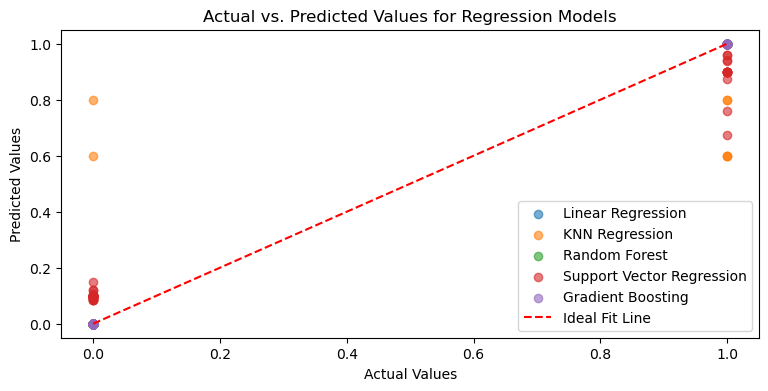

In [104]:
import matplotlib.pyplot as plt
import numpy as np

models = {
    "Linear Regression": y_pred,  
    "KNN Regression": y_pred_knn,
    "Random Forest": y_pred_rf,
    "Support Vector Regression": y_pred_svr,
    "Gradient Boosting": y_pred_gb
}

plt.figure(figsize=(9, 4))

# Scatter plot for each model
for model_name, y_pred in models.items():
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.6)

# Ideal Fit Line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Ideal Fit Line")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Regression Models")
plt.legend()
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------
# Result
Best Performing Models:
- Linear Regression (R² = 1.000), Random Forest Regression (R² = 1.000), and Gradient Boosting Regression (R² = 1.000) achieved perfect scores, indicating that they accurately fit the data with minimal errors.
- These models are ideal for predicting optimal promotion timing.
- Support Vector Regression (R² = 0.942) and KNN Regression (R² = 0.856) also performed well, with relatively low MSE and MAE, making them strong candidates for practical implementation.